<a href="https://colab.research.google.com/github/Darrystic/AI-Tools-Assignment/blob/main/mnist_cnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# notebooks/02_mnist_cnn_tensorflow.ipynb


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.Z2M9VF_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.Z2M9VF_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 113ms/step - accuracy: 0.8187 - loss: 0.5888 - val_accuracy: 0.9796 - val_loss: 0.0668
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9733 - loss: 0.0926 - val_accuracy: 0.9864 - val_loss: 0.0385
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9805 - loss: 0.0670 - val_accuracy: 0.9876 - val_loss: 0.0362
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9834 - loss: 0.0547 - val_accuracy: 0.9896 - val_loss: 0.0319
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9868 - loss: 0.0458 - val_accuracy: 0.9917 - val_loss: 0.0263
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9920 - val_loss: 0.0246
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accuracy: 0.9922 - val_loss: 0.0231
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9907 - loss: 0.0299 - val_a

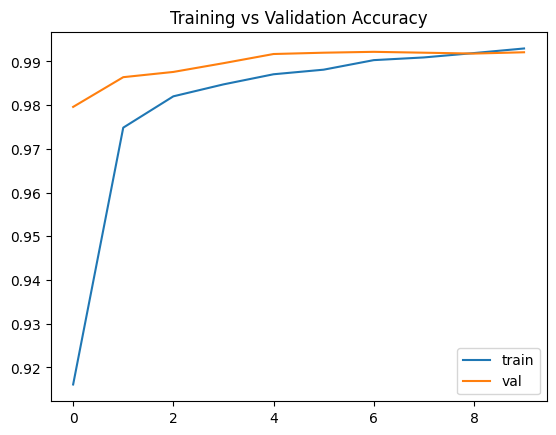

In [1]:
import nbformat

path = "your_notebook.ipynb"  # Replace with your filename
nb = nbformat.read(path, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

nbformat.write(nb, path)
print("Cleaned metadata and saved successfully.")

!pip install -q tensorflow tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Download + prepare
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img).shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test  = ds_test.map(normalize_img).batch(128).cache().prefetch(tf.data.AUTOTUNE)

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_test, epochs=10)

print("Final test accuracy:", model.evaluate(ds_test)[1])

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend(); plt.title("Training vs Validation Accuracy")
plt.show()
